In [6]:
# Import des données 


import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("caveman.txt", delimiter=":")

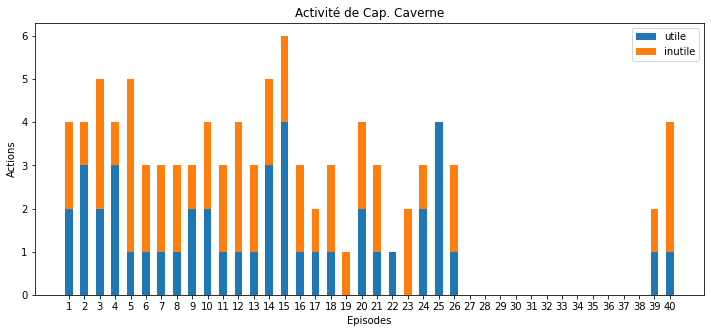

In [8]:
fig,ax = plt.subplots(figsize=(12,5))

nbEpisodes = max(df["episode"])
width = 0.5

ind = np.arange(1,nbEpisodes+1)

utileParEp = []
pasUtileParEp = []

for i in range(1,nbEpisodes+1):
    utileParEp.append(df.loc[(df["episode"]==i) & (df['utile'] == 1)].shape[0])
    pasUtileParEp.append(df.loc[(df["episode"]==i) & (df['utile'] == 0)].shape[0])

    
p1 = ax.bar(ind, utileParEp, width)
p2 = ax.bar(ind, pasUtileParEp, width,bottom = utileParEp)
ax.set(ylabel='Actions', xlabel="Episodes", title="Activité de Cap. Caverne")
plt.xticks(ind, ind)

ax.legend((p1[0], p2[0]), ('utile', 'inutile'))
fig.savefig("general.png")




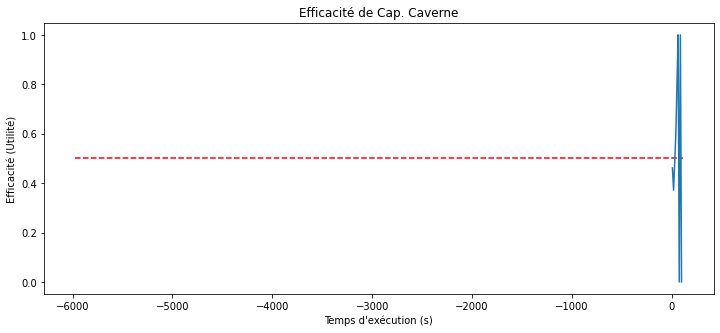

In [9]:
fig,ax = plt.subplots(figsize=(12,5))

nbin = 10
xmin = min(df["duree"])
xmax = max(df["duree"])


xstep  = (xmax)/nbin

dur = [ 0 + xstep * i for i in range(nbin)]

inter=[]
moys=[]
a = 0
for i in range(1,len(dur)):
    inter.append([dur[i-1],dur[i]])
    moy = (dur[i] + dur[i-1])/2
    moys.append(moy)

    
nbres=[]

for i in inter:
    ratio = 0
    nbUtile = df.loc[(df["duree"]>=i[0]) & (df['duree'] <= i[1]) & (df["utile"] == 1)].shape[0]
    nbInutile = df.loc[(df["duree"]>=i[0]) & (df['duree'] <= i[1]) & (df["utile"] == 0)].shape[0]
    if nbUtile + nbInutile != 0 : 
        ratio = nbUtile/(nbInutile+nbUtile)
    nbres.append(ratio)

ax.hlines(y=0.5,xmin=int(xmin), xmax=int(xmax),color="r", ls="--")
ax.plot(moys, nbres)
ax.set(xlabel="Temps d'exécution (s)", ylabel="Efficacité (Utilité)", title="Efficacité de Cap. Caverne")

fig.savefig("utilite_temps.png")

/var/folders/43/fxlfnyfs2ds0s1ldb1bcz55m0000gn/T/ipykernel_45842/3877267996.py:3: RuntimeWarning: invalid value encountered in true_divide
  ratios = np.array(utileParEp)/(np.array(pasUtileParEp)+np.array(utileParEp))


Prop:  46.8% utile VS 53.2% pas utile


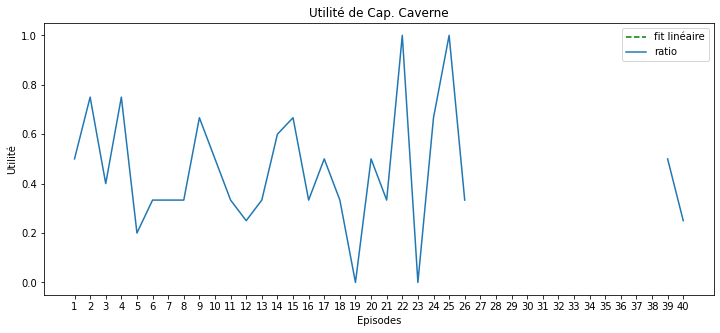

In [10]:
fig,ax = plt.subplots(figsize=(12,5))

ratios = np.array(utileParEp)/(np.array(pasUtileParEp)+np.array(utileParEp))

linear_model=np.polyfit(ind,ratios,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(1,nbEpisodes + 1)
ax.plot(x_s,linear_model_fn(x_s),color="green", label="fit linéaire", ls="--")
ax.plot(ind, ratios, label="ratio")
plt.xticks(ind, ind)
ax.set(xlabel="Episodes", ylabel="Utilité", title="Utilité de Cap. Caverne")
ax.legend()
fig.savefig("utilite_ep.png")

print("Prop: ", f"{sum(utileParEp)/sum([*utileParEp,*pasUtileParEp])*100:.1f}% utile VS {sum(pasUtileParEp)/sum([*utileParEp,*pasUtileParEp])*100:.1f}% pas utile")